In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import time

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # Convert labels to one-hot encoding

# BASE MODEL

base_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

st = time.time()
base_model_history = base_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
sp = time.time()

print("- -" * 40)

base_test_loss, base_test_acc = base_model.evaluate(x_test, y_test)
base_time_taken = round(sp-st, 2)
print(f"Base Model Results:\n\nTest Loss: {round(base_test_loss, 4)}\nTest Accuracy: {round(base_test_acc * 100, 2)}%\nTime Taken: {base_time_taken} seconds")

# # MODELS WITH KERNEL INITIALIZERS
# Xavier & Kaiming Weight Initializers

def create_model(initializer=None):
    model_with_kernel = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(256, activation='relu', kernel_initializer=initializer),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dense(64, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax')
    ])
    return model_with_kernel

res = []

# glorot_uniform - Xavier Weight Initializer, he_normal - Kaiming Weight Initializer
weight_initializers = ['glorot_uniform', 'he_normal']

for init in weight_initializers:
    print(f"Training with initializer: {init}\n")

    model = create_model(initializer=init)
    model.compile(optimizer='sgd',  loss='categorical_crossentropy', metrics=['accuracy'])

    wei_st = time.time()
    model.fit(x_train, y_train, epochs=5)
    wei_sp = time.time()

    test_loss, test_accuracy = model.evaluate(x_test, y_test)

    time_taken = wei_sp - wei_st
    res.append((time_taken, test_accuracy))

    print(f"\nTest Accuracy (using '{init}' weight initialization): {round(test_accuracy * 100, 2)}%\n\nTime Taken: {round(time_taken, 2)} seconds\n")

    print("- -" * 40)

# Comparison with baseline results
base_glorot_acc = round(base_test_acc / res[0][1], 2)
base_glorot_time = round(base_time_taken / res[0][0], 3)
base_he_acc = round(base_test_acc / res[1][1])
base_he_time = round(base_time_taken / res[1][0], 3)

print(f"Baseline Results Comparison:\n\nAccuracy comparison:\n{weight_initializers[0]}: {base_glorot_acc}% accurate than base model\n{weight_initializers[1]}: {base_he_acc}% accurate than base model")
print(f"\nTime comparison:\n{weight_initializers[0]}: {base_glorot_time} seconds faster than base model\n{weight_initializers[1]}: {base_he_time} seconds faster than base model")


# # MODEL WITH DROPOUT LAYER
# Dropout Rate - 0.2

model_with_dropout = models.Sequential([
      layers.Flatten(input_shape=(32, 32, 3)),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(10, activation='softmax')
  ])

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model_with_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_with_dropout.fit(x_train, y_train, epochs=5)

dropout_test_loss, dropout_test_accuracy = model_with_dropout.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {round(dropout_test_accuracy * 100, 4)}%")

print("- -" * 40)

# Comparison with baseline results
base_dropout_acc = round(base_test_acc / dropout_test_accuracy , 2)

print(f"Baseline Results Comparison:\nAccuracy: {base_dropout_acc}% faster than base model")


# # MODEL WITH KERNEL REGULARIZER
# L2 Kernel Regularizer

model_with_reg = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model_with_reg.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_with_reg.fit(x_train, y_train, epochs=5)

reg_test_loss, reg_test_accuracy = model_with_reg.evaluate(x_test, y_test)
print(f"\nTest Accuracy : {round(reg_test_accuracy * 100, 4)}%")

print("- -" * 40)

# Comparison with baseline results
base_reg_acc = round(base_test_acc / reg_test_accuracy , 2)

print(f"Baseline Results Comparison:\nAccuracy: {base_reg_acc}% faster than base model")

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 1.8673 - accuracy: 0.3254 - val_loss: 1.7259 - val_accuracy: 0.3862
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6896 - accuracy: 0.3938 - val_loss: 1.6166 - val_accuracy: 0.4282
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6106 - accuracy: 0.4236 - val_loss: 1.6263 - val_accuracy: 0.4177
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 1.5517 - accuracy: 0.4467 - val_loss: 1.5729 - val_accuracy: 0.4389
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 1.5087 - accuracy: 0.4581 - val_loss: 1.5045 - val_accuracy: 0.4639
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
313/313 [==============================] - 0s 1ms/step - loss: 1.5045 - accuracy: 0.4639
Base Model Results:

Test Loss: 1.5045
Test Accuracy: 46.39%
Time Taken: 27.41 second

1/1 [==============================] - 0s 47ms/step


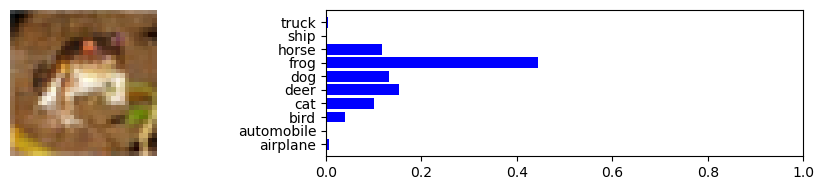

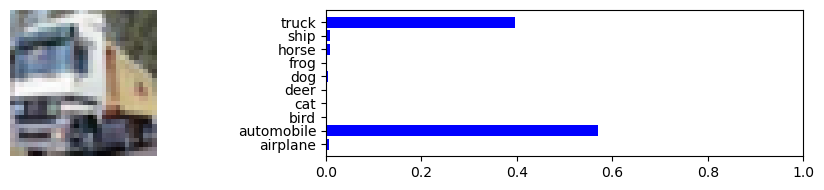